In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [58]:
df=pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [60]:
df.StockCode.duplicated().sum()

537839

In [61]:
df.InvoiceNo.duplicated().sum()

516009

In [62]:
df_check = df[['InvoiceNo','StockCode']]
df_check.duplicated().sum()

10684

In [63]:
df['is_duplicate']=df[['InvoiceNo','StockCode']].duplicated()
df[df['is_duplicate']==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_duplicate
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,True
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,True
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,True
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,True
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,True
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom,True
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom,True
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,True


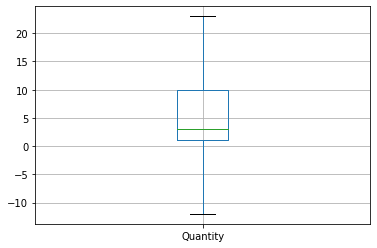

In [64]:
df.Quantity.plot(kind='box', grid=True,showfliers=False)

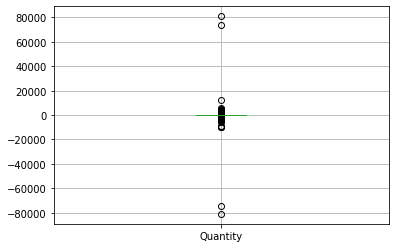

In [65]:
df.boxplot('Quantity')

In [66]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [67]:
df[df.Quantity<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_duplicate
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,False
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,False
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,False
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,False
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,False
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,False
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,False
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,False


In [68]:
df['OrderCancel']=df['InvoiceNo'].str.startswith('C')
df[df.Quantity<=0].OrderCancel.value_counts()

True    9288
Name: OrderCancel, dtype: int64

In [69]:
#mean_quantity= df.Quantity.mean()
#df['Quantity'].replace([df.Quantity<=0],'mean_quantity')

In [70]:
df = df.loc[df['Quantity'] > 0]

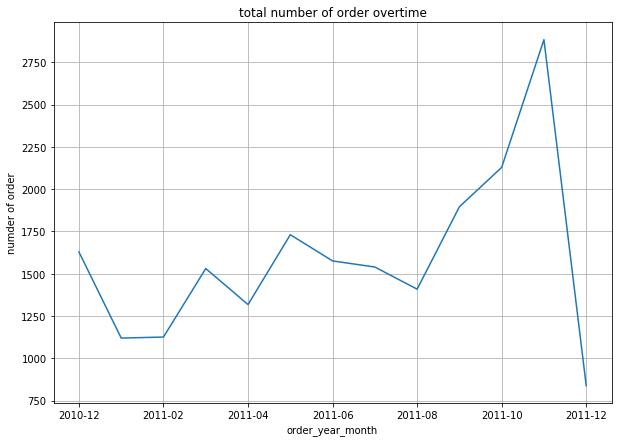

In [71]:
df['order_year_month']=df.InvoiceDate.dt.strftime('%Y-%m')
df.groupby('order_year_month').InvoiceNo.nunique()
ax=df.groupby('order_year_month').InvoiceNo.nunique().plot(figsize=(10,7), grid=True)
ax.set_title('total number of order overtime')
ax.set_ylabel('numder of order')
ax

In [72]:
invoice_dates=df.loc[df['order_year_month']>='2011-12','InvoiceDate']

In [73]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [74]:
df=df.loc[df['order_year_month']<'2011-12']

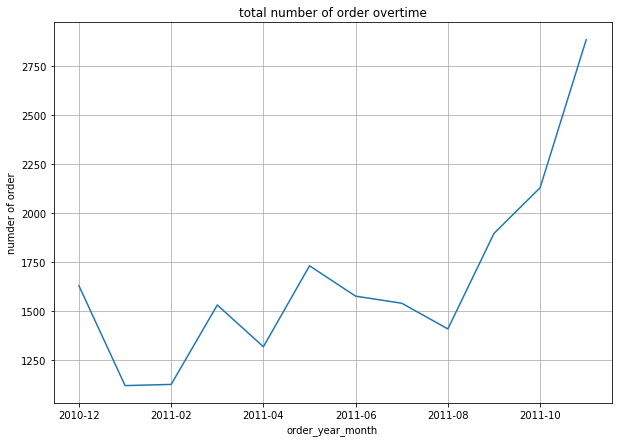

In [75]:
ax=df.groupby('order_year_month').InvoiceNo.nunique().plot(figsize=(10,7), grid=True)
ax.set_title('total number of order overtime')
ax.set_ylabel('numder of order')
ax

In [76]:
df['sales']= df['Quantity'] * df['UnitPrice']
monthly_revenue=df.groupby('order_year_month')['sales'].sum()
monthly_revenue

order_year_month
2010-12     823746.140
2011-01     691364.560
2011-02     523631.890
2011-03     717639.360
2011-04     537808.621
2011-05     770536.020
2011-06     761739.900
2011-07     719221.191
2011-08     737014.260
2011-09    1058590.172
2011-10    1154979.300
2011-11    1509496.330
Name: sales, dtype: float64

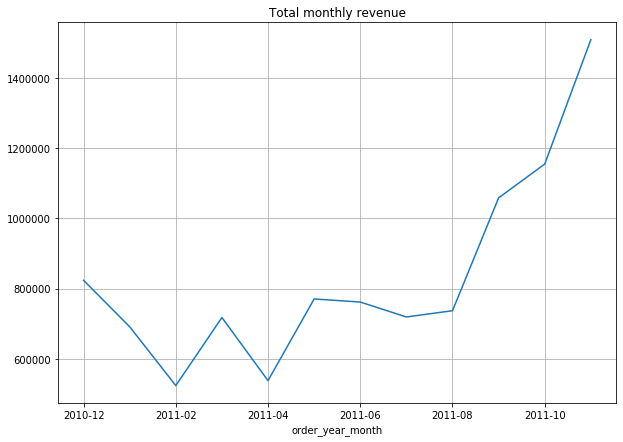

In [77]:
ax = monthly_revenue.plot(figsize = (10,7),grid = True)
ax.set_title('Total monthly revenue')
ax

In [78]:
grouped_df=df.groupby(['order_year_month','CustomerID'])['InvoiceNo'].nunique().reset_index()
repeat_customer_df= grouped_df[grouped_df.InvoiceNo>=1].groupby('order_year_month').CustomerID.count().reset_index()
repeat_customer_df.columns=['orderDate','nbr_repeat_customer']
repeat_customer_df

,orderDate,nbr_repeat_customer
0,2010-12,885
1,2011-01,741
2,2011-02,758
3,2011-03,974
4,2011-04,856
5,2011-05,1056
6,2011-06,991
7,2011-07,949
8,2011-08,935
9,2011-09,1266


In [79]:
full_customer_df=grouped_df.groupby('order_year_month').CustomerID.count().reset_index()
full_customer_df.columns=['orderDate','nbr_customer']
repeat_customer_df=repeat_customer_df.merge(full_customer_df, on='orderDate',how='left')
repeat_customer_df['repeat_cst_pct']=repeat_customer_df['nbr_repeat_customer']/repeat_customer_df['nbr_customer']
repeat_customer_df

,orderDate,nbr_repeat_customer,nbr_customer,repeat_cst_pct
0,2010-12,885,885,1.0
1,2011-01,741,741,1.0
2,2011-02,758,758,1.0
3,2011-03,974,974,1.0
4,2011-04,856,856,1.0
5,2011-05,1056,1056,1.0
6,2011-06,991,991,1.0
7,2011-07,949,949,1.0
8,2011-08,935,935,1.0
9,2011-09,1266,1266,1.0


In [80]:
best_seller_items=[23084, 84826,22197, '85099B']


Text(0.5, 1.0, 'Item trends over time')

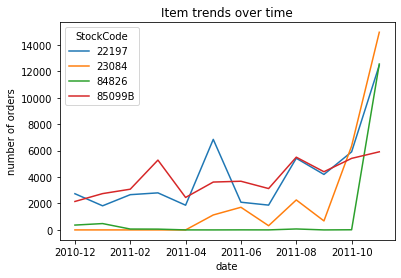

In [81]:
trending_items_df=df[df['StockCode'].isin(best_seller_items)]\
.groupby(['order_year_month','StockCode']).Quantity.sum()
ax=trending_items_df.unstack().fillna(0).plot()
ax.set_ylabel('number of orders')
ax.set_xlabel('date')
ax.set_title('Item trends over time')

# homework

In [82]:

import io

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

ModuleNotFoundError: No module named 'mlxtend'

In [51]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


'C:\Users\My' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
import mlxtend

ModuleNotFoundError: No module named 'mlxtend'